In [1]:
!pip install soccerdata

In [2]:
import soccerdata as sd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import time
import requests

[06/02/25 12:38:33] INFO     No custom team name replacements found. You can configure these in       ]8;id=202597;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=894413;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py#91\91]8;;\
                             /root/soccerdata/config/teamname_replacements.json.                                   

                    INFO     Custom league dict loaded from                                          ]8;id=449888;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=175966;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py#195\195]8;;\
                             /root/soccerdata/config/league_dict.json.                                             

In [3]:
sd.FBref.available_leagues()

['BRA-Serie A',
 'Big 5 European Leagues Combined',
 'ENG-Premier League',
 'ESP-La Liga',
 'FRA-Ligue 1',
 'GER-Bundesliga',
 'INT-European Championship',
 "INT-Women's World Cup",
 'INT-World Cup',
 'ITA-Serie A']

In [4]:
fbref = sd.FBref(leagues="BRA-Serie A", seasons=2025)
print(fbref.__doc__)

[06/02/25 12:38:38] INFO     Saving cached data to /root/soccerdata/data/FBref                       ]8;id=999345;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=311023;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_common.py#263\263]8;;\

Provides pd.DataFrames from data at http://fbref.com.

    Data will be downloaded as necessary and cached locally in
    ``~/soccerdata/data/FBref``.

    Parameters
    ----------
    leagues : string or iterable, optional
        IDs of leagues to include. For efficiently reading data from the Top-5
        European leagues, use "Big 5 European Leagues Combined".
    seasons : string, int or list, optional
        Seasons to include. Supports multiple formats.
        Examples: '16-17'; 2016; '2016-17'; [14, 15, 16]
    proxy : 'tor' or dict or list(dict) or callable, optional
        Use a proxy to hide your IP address. Valid options are:
            - "tor": Uses the Tor network. Tor should be running in
              the background on port 9050.
            - dict: A dictionary with the proxy to use. The dict should be
              a mapping of supported protocols to proxy addresses. For example::

                  {
                      'http': 'http://10.10.1.10:3128',
     

In [5]:
# 1 - Join player_season_misc + player_season_std
 #por nome ou idade

# Filtrar jogadores com pelo menos 600 minutos jogados

# Remover goleiros (GK) e Zagueiros (DF)

#2- Selecionar as colunas   ('Playing Time', 'Min'),
#    ('Progression', 'PrgR'),
#    ('Expected', 'xG'),
#    ('Expected', 'xAG'),
#    ('Performance', 'G-PK'),
#    ('Performance', 'Ast'),
#    ('Progression', 'PrgC'),
#    ('Progression', 'PrgP')
#    ('Aerial Duels', 'Won%'),
#    ('Aerial Duels', 'Won'),
#    ('Aerial Duels', 'Lost')

In [6]:
player_season_std = fbref.read_player_season_stats(stat_type="standard")
player_season_std.head()

[06/02/25 12:38:45] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=666393;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=691426;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

[06/02/25 12:38:51] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/_common.py:145:     ]8;id=76350;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=72275;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"                   
                               warnings.warn(msg, stacklevel=1)                                                    
                                                                                                                   

nation    pos     age  \
                                                                             
league      season team             player                                   
BRA-Serie A 2526   Atlético Mineiro Alan Franco         ECU     MF  26-285   
                                    Bernard             BRA  FW,MF  32-267   
                                    Brahian Palacios    COL     MF  22-190   
                                    Caio Paulista       BRA     DF  27-022   
                                    Fausto Vera         ARG     MF  25-068   

                                                      born Playing Time  \
                                                                     MP   
league      season team             player                                
BRA-Serie A 2526   Atlético Mineiro Alan Franco       1998            7   
                                    Bernard           1992            9   
                                    Brahian Palacios  2002            1   
                                    Caio Paulista     1998            4   
                                    Fausto Vera       2000            7   

                                                                       \
                                                     Starts  Min  90s   
league      season team             player                              
BRA-Serie A 2526   Atlético Mineiro Alan Franco           7  585  6.5   
                                    Bernard               1  215  2.4   
                                    Brahian Palacios      0    8  0.1   
                                    Caio Paulista         3  208  2.3   
                                    Fausto Vera           5  439  4.9   

                                                     Performance      ...  \
                                                             Gls Ast  ...   
league      season team             player                            ...   
BRA-Serie A 2526   Atlético Mineiro Alan Franco                0   0  ...   
                                    Bernard                    0   0  ...   
                                    Brahian Palacios           0   0  ...   
                                    Caio Paulista              0   0  ...   
                                    Fausto Vera                1   0  ...   

                                                     Per 90 Minutes       \
                                                                Gls  Ast   
league      season team             player                                 
BRA-Serie A 2526   Atlético Mineiro Alan Franco                 0.0  0.0   
                                    Bernard                     0.0  0.0   
                                    Brahian Palacios            0.0  0.0   
                                    Caio Paulista               0.0  0.0   
                                    Fausto Vera                0.21  0.0   

                                                                               \
                                                       G+A  G-PK G+A-PK    xG   
league      season team             player                                      
BRA-Serie A 2526   Atlético Mineiro Alan Franco        0.0   0.0    0.0  0.01   
                                    Bernard            0.0   0.0    0.0  0.02   
                                    Brahian Palacios   0.0   0.0    0.0   0.0   
                                    Caio Paulista      0.0   0.0    0.0  0.15   
                                    Fausto Vera       0.21  0.21   0.21  0.09   

                                                                         \
                                                       xAG xG+xAG  npxG   
league      season team             player                                
BRA-Serie A 2526   Atlético Mineiro Alan Franco        0.0   0.01  0.01   
                                    Bernard           0.18    0.2  

In [7]:
player_season_std = player_season_std.reset_index()
print(player_season_std.columns)
player_season_std.head()

MultiIndex([(        'league',         ''),
            (        'season',         ''),
            (          'team',         ''),
            (        'player',         ''),
            (        'nation',         ''),
            (           'pos',         ''),
            (           'age',         ''),
            (          'born',         ''),
            (  'Playing Time',       'MP'),
            (  'Playing Time',   'Starts'),
            (  'Playing Time',      'Min'),
            (  'Playing Time',      '90s'),
            (   'Performance',      'Gls'),
            (   'Performance',      'Ast'),
            (   'Performance',      'G+A'),
            (   'Performance',     'G-PK'),
            (   'Performance',       'PK'),
            (   'Performance',    'PKatt'),
            (   'Performance',     'CrdY'),
            (   'Performance',     'CrdR'),
            (      'Expected',       'xG'),
            (      'Expected',     'npxG'),
            (      'Expected',  

league season              team            player nation    pos  \
                                                                          
0  BRA-Serie A   2526  Atlético Mineiro       Alan Franco    ECU     MF   
1  BRA-Serie A   2526  Atlético Mineiro           Bernard    BRA  FW,MF   
2  BRA-Serie A   2526  Atlético Mineiro  Brahian Palacios    COL     MF   
3  BRA-Serie A   2526  Atlético Mineiro     Caio Paulista    BRA     DF   
4  BRA-Serie A   2526  Atlético Mineiro       Fausto Vera    ARG     MF   

      age  born Playing Time         ... Per 90 Minutes                   \
                          MP Starts  ...            Gls  Ast   G+A  G-PK   
0  26-285  1998            7      7  ...            0.0  0.0   0.0   0.0   
1  32-267  1992            9      1  ...            0.0  0.0   0.0   0.0   
2  22-190  2002            1      0  ...            0.0  0.0   0.0   0.0   
3  27-022  1998            4      3  ...            0.0  0.0   0.0   0.0   
4  25-068  2000            7      5  ...           0.21  0.0  0.21  0.21   

                                            
  G+A-PK    xG   xAG xG+xAG  npxG npxG+xAG  
0    0.0  0.01   0.0   0.01  0.01     0.01  
1    0.0  0.02  0.18    0.2  0.02      0.2  
2    0.0   0.0   0.0    0.0   0.0      0.0  
3    0.0  0.15  0.04   0.19  0.15     0.19  
4   0.21  0.09  0.03   0.12  0.09     0.12  

[5 rows x 37 columns]

In [8]:
player_season_misc = fbref.read_player_season_stats(stat_type="misc")
player_season_misc.head()

[06/02/25 12:38:58] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=948761;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=757801;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

[06/02/25 12:38:59] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/_common.py:145:     ]8;id=861141;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=407935;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"                   
                               warnings.warn(msg, stacklevel=1)                                                    
                                                                                                                   

nation    pos     age  \
                                                                             
league      season team             player                                   
BRA-Serie A 2526   Atlético Mineiro Alan Franco         ECU     MF  26-285   
                                    Bernard             BRA  FW,MF  32-267   
                                    Brahian Palacios    COL     MF  22-190   
                                    Caio Paulista       BRA     DF  27-022   
                                    Fausto Vera         ARG     MF  25-068   

                                                      born  90s Performance  \
                                                                       CrdY   
league      season team             player                                    
BRA-Serie A 2526   Atlético Mineiro Alan Franco       1998  6.5           1   
                                    Bernard           1992  2.4           1   
                                    Brahian Palacios  2002  0.1           0   
                                    Caio Paulista     1998  2.3           1   
                                    Fausto Vera       2000  4.9           1   

                                                                         ...  \
                                                     CrdR 2CrdY Fls Fld  ...   
league      season team             player                               ...   
BRA-Serie A 2526   Atlético Mineiro Alan Franco         0     0   8   3  ...   
                                    Bernard             0     0   5   3  ...   
                                    Brahian Palacios    0     0   0   0  ...   
                                    Caio Paulista       0     0   4   2  ...   
                                    Fausto Vera         0     0   6   3  ...   

                                                                               \
                                                     Crs Int TklW PKwon PKcon   
league      season team             player                                      
BRA-Serie A 2526   Atlético Mineiro Alan Franco        2   2   10     0     0   
                                    Bernard            6   0    3     0     0   
                                    Brahian Palacios   0   0    0     0     0   
                                    Caio Paulista      6   3    4     0     0   
                                    Fausto Vera        2   4    6     0     0   

                                                              Aerial Duels  \
                                                     OG Recov          Won   
league      season team             player                                   
BRA-Serie A 2526   Atlético Mineiro Alan Franco       0    21            8   
                                    Bernard           0    13            1   
                                    Brahian Palacios  0     1            0   
                                    Caio Paulista     0    10            3   
                                    Fausto Vera       0    19            3   

                                                                  
                                                     Lost   Won%  
league      season team             player                        
BRA-Serie A 2526   Atlético Mineiro Alan Franco         1   88.9  
                                    Bernard             0  100.0  
                                    Brahian Palacios    0   <NA>  
                                    Caio Paulista       1   75.0  
                                    Fausto Vera         5   37.5  

[5 rows x 21 columns]

In [9]:
player_season_misc = player_season_misc.reset_index()
print(player_season_misc.columns)
player_season_misc.head()

MultiIndex([(      'league',      ''),
            (      'season',      ''),
            (        'team',      ''),
            (      'player',      ''),
            (      'nation',      ''),
            (         'pos',      ''),
            (         'age',      ''),
            (        'born',      ''),
            (         '90s',      ''),
            ( 'Performance',  'CrdY'),
            ( 'Performance',  'CrdR'),
            ( 'Performance', '2CrdY'),
            ( 'Performance',   'Fls'),
            ( 'Performance',   'Fld'),
            ( 'Performance',   'Off'),
            ( 'Performance',   'Crs'),
            ( 'Performance',   'Int'),
            ( 'Performance',  'TklW'),
            ( 'Performance', 'PKwon'),
            ( 'Performance', 'PKcon'),
            ( 'Performance',    'OG'),
            ( 'Performance', 'Recov'),
            ('Aerial Duels',   'Won'),
            ('Aerial Duels',  'Lost'),
            ('Aerial Duels',  'Won%')],
           )


league season              team            player nation    pos  \
                                                                          
0  BRA-Serie A   2526  Atlético Mineiro       Alan Franco    ECU     MF   
1  BRA-Serie A   2526  Atlético Mineiro           Bernard    BRA  FW,MF   
2  BRA-Serie A   2526  Atlético Mineiro  Brahian Palacios    COL     MF   
3  BRA-Serie A   2526  Atlético Mineiro     Caio Paulista    BRA     DF   
4  BRA-Serie A   2526  Atlético Mineiro       Fausto Vera    ARG     MF   

      age  born  90s Performance  ...                                    \
                            CrdY  ... Crs Int TklW PKwon PKcon OG Recov   
0  26-285  1998  6.5           1  ...   2   2   10     0     0  0    21   
1  32-267  1992  2.4           1  ...   6   0    3     0     0  0    13   
2  22-190  2002  0.1           0  ...   0   0    0     0     0  0     1   
3  27-022  1998  2.3           1  ...   6   3    4     0     0  0    10   
4  25-068  2000  4.9           1  ...   2   4    6     0     0  0    19   

  Aerial Duels              
           Won Lost   Won%  
0            8    1   88.9  
1            1    0  100.0  
2            0    0   <NA>  
3            3    1   75.0  
4            3    5   37.5  

[5 rows x 25 columns]

In [10]:
# 1. Achatar o MultiIndex para facilitar a manipulação
player_season_std.columns = ['_'.join(col).strip() for col in player_season_std.columns]
player_season_misc.columns = ['_'.join(col).strip() for col in player_season_misc.columns]

# 2. Verificar os novos nomes das colunas
print(player_season_std.columns)
print(player_season_misc.columns)

# 3. Selecionar as colunas desejadas de cada DataFrame
df_std_selected = player_season_std[
    ['player_', 'team_','pos_','Playing Time_Min', 'Progression_PrgR', 'Expected_xG', 'Expected_xAG', 'Performance_G-PK', 'Performance_Ast', 'Progression_PrgC', 'Progression_PrgP']
]
df_misc_selected = player_season_misc[
    ['player_', 'team_', 'Aerial Duels_Won%', 'Aerial Duels_Won', 'Aerial Duels_Lost']
]

# 4. Realizar o merge dos dois DataFrames com base nas colunas 'player' e 'team'
df_merged = pd.merge(df_std_selected, df_misc_selected, on=['player_', 'team_'], how='inner')

# 5. Exibir o resultado
print(df_merged.head())

Index(['league_', 'season_', 'team_', 'player_', 'nation_', 'pos_', 'age_',
       'born_', 'Playing Time_MP', 'Playing Time_Starts', 'Playing Time_Min',
       'Playing Time_90s', 'Performance_Gls', 'Performance_Ast',
       'Performance_G+A', 'Performance_G-PK', 'Performance_PK',
       'Performance_PKatt', 'Performance_CrdY', 'Performance_CrdR',
       'Expected_xG', 'Expected_npxG', 'Expected_xAG', 'Expected_npxG+xAG',
       'Progression_PrgC', 'Progression_PrgP', 'Progression_PrgR',
       'Per 90 Minutes_Gls', 'Per 90 Minutes_Ast', 'Per 90 Minutes_G+A',
       'Per 90 Minutes_G-PK', 'Per 90 Minutes_G+A-PK', 'Per 90 Minutes_xG',
       'Per 90 Minutes_xAG', 'Per 90 Minutes_xG+xAG', 'Per 90 Minutes_npxG',
       'Per 90 Minutes_npxG+xAG'],
      dtype='object')
Index(['league_', 'season_', 'team_', 'player_', 'nation_', 'pos_', 'age_',
       'born_', '90s_', 'Performance_CrdY', 'Performance_CrdR',
       'Performance_2CrdY', 'Performance_Fls', 'Performance_Fld',
       'Performan

In [11]:
# Filtrar jogadores com pelo menos 600 minutos jogados
filtered_data = df_merged[df_merged[('Playing Time_Min')] >= 600]

# Filtrar para remover goleiros (GK) e zagueiros (DF)
filtered_data = filtered_data[
    ~filtered_data[('pos_')].str.contains('GK|DF', na=False)
]

# Exibir as primeiras linhas para confirmar a filtragem
print(filtered_data.head())


           player_             team_   pos_  Playing Time_Min  \
7   Gustavo Scarpa  Atlético Mineiro  MF,FW               868   
8             Hulk  Atlético Mineiro  FW,MF               822   
19            Rony  Atlético Mineiro  FW,MF               921   
22    Tomás Cuello  Atlético Mineiro  FW,MF               673   
26  Caio Alexandre             Bahia     MF               651   

    Progression_PrgR  Expected_xG  Expected_xAG  Performance_G-PK  \
7                 38          0.7           2.4                 0   
8                 78          1.8           2.0                 0   
19                66          3.6           0.2                 3   
22                85          1.7           0.6                 1   
26                 9          0.1           1.0                 0   

    Performance_Ast  Progression_PrgC  Progression_PrgP  Aerial Duels_Won%  \
7                 1                18                70               31.3   
8                 2                18 

In [12]:
# Selecionar as colunas desejadas para análise
striker = filtered_data[[
    ('player_'),
    ('team_'),
    ('pos_'),
    ('Playing Time_Min'),
    ('Progression_PrgR'),
    ('Expected_xG'),
    ('Expected_xAG'),
    ('Performance_G-PK'),
    ('Performance_Ast'),
    ('Progression_PrgC'),
    ('Progression_PrgP'),
    ('Aerial Duels_Won%'),
    ('Aerial Duels_Won'),
    ('Aerial Duels_Lost'),
]]

# Renomear as colunas para facilitar o uso
striker.columns = ['jogador','time','posicao', 'Minutos', 'PrgR', 'xG', 'xAG', 'G-PK', 'Assistencias', 'PrgC', 'PrgP','Aerial Duel%','Aerial Duel Won','Aerial Duel Lost']

# Exibir as primeiras linhas para confirmar a seleção de colunas
print(striker.head())


# Criar a nova coluna 'Aerial Duels ' no formato "50% (10/10)"
striker['Aerial Duels '] = (
    striker['Aerial Duel%'].astype(str) + '% (' +
    striker['Aerial Duel Won'].astype(str) + '/' +
    striker['Aerial Duel Lost'].astype(str) + ')')

# Criar uma nova coluna 'Acoes_Ofensivas' somando 'PrgC' e 'PrgP'
striker['Acoes Ofensivas'] = striker['PrgC'] + striker['PrgP']

# Remover jogadores com todas as métricas iguais a 0
striker = striker[(striker[['PrgR', 'xG', 'xAG', 'G-PK', 'Assistencias', 'PrgC', 'PrgP']] != 0).any(axis=1)]
# Exportar o dataframe para um arquivo CSV
striker.to_csv('striker_data.csv', index=False, encoding='utf-8-sig')
# Exibir as primeiras linhas para conferir
print(striker)


           jogador              time posicao  Minutos  PrgR   xG  xAG  G-PK  \
7   Gustavo Scarpa  Atlético Mineiro   MF,FW      868    38  0.7  2.4     0   
8             Hulk  Atlético Mineiro   FW,MF      822    78  1.8  2.0     0   
19            Rony  Atlético Mineiro   FW,MF      921    66  3.6  0.2     3   
22    Tomás Cuello  Atlético Mineiro   FW,MF      673    85  1.7  0.6     1   
26  Caio Alexandre             Bahia      MF      651     9  0.1  1.0     0   

    Assistencias  PrgC  PrgP  Aerial Duel%  Aerial Duel Won  Aerial Duel Lost  
7              1    18    70          31.3                5                11  
8              2    18    17          47.1                8                 9  
19             0    14    18          38.9               14                22  
22             0    39    37          28.6                4                10  
26             1     5    47          33.3                2                 4  
            jogador              time posicao

### **2. Criar modelos de classificação para  (ATACANTE)**

In [13]:
# Padronizar os dados para clusterização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(striker[['PrgR','xG','xAG','G-PK','Assistencias','Acoes Ofensivas','Aerial Duel Won','Aerial Duel Lost']])

# Definir e ajustar o modelo K-Means
kmeans = KMeans(n_clusters=5, init='random', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adicionar os clusters ao DataFrame
striker['Cluster'] = clusters

# Exibir os jogadores com seus clusters
print(striker[['PrgR','xG','xAG','G-PK','Assistencias','Cluster']])

     PrgR   xG  xAG  G-PK  Assistencias  Cluster
7      38  0.7  2.4     0             1        0
8      78  1.8  2.0     0             2        2
19     66  3.6  0.2     3             0        3
22     85  1.7  0.6     1             0        0
26      9  0.1  1.0     0             1        0
..    ...  ...  ...   ...           ...      ...
507    17  4.9  0.5     7             1        1
511    50  1.3  0.8     1             1        3
524    33  0.7  0.3     1             0        3
530    27  1.5  0.3     2             0        4
536    16  0.1  0.5     0             0        4

[72 rows x 6 columns]


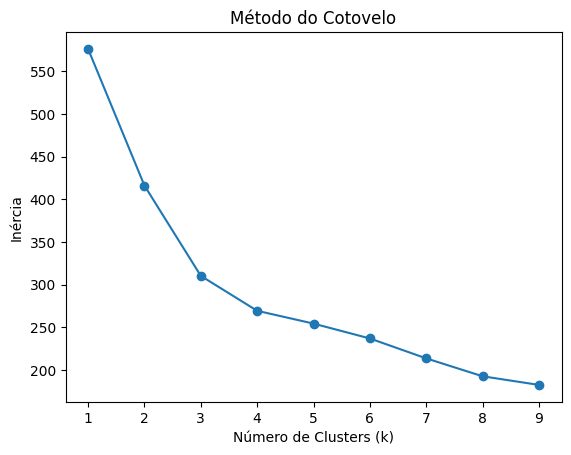

In [14]:
#Avaliar o Número de Clusters
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

In [15]:
# Calcular as médias de cada cluster apenas para colunas numéricas
cluster_summary = striker.groupby('Cluster').agg({col: 'mean' for col in striker.select_dtypes(include=['number']).columns})
print(cluster_summary)

            Minutos       PrgR        xG       xAG      G-PK  Assistencias  \
Cluster                                                                      
0            744.75      37.25     0.715       1.1       0.5          1.25   
1             785.6       37.8      3.98      1.24       4.6           1.0   
2        768.333333       69.0  2.133333  2.133333       2.0      2.888889   
3        733.333333  49.933333      1.98      0.64  1.533333      0.666667   
4        706.869565  11.608696  0.326087  0.313043  0.347826       0.26087   

              PrgC       PrgP  Aerial Duel%  Aerial Duel Won  \
Cluster                                                        
0            15.65      44.25        40.165              4.1   
1              8.2       12.4         43.68             24.0   
2        28.222222  35.111111     31.833333              4.0   
3        14.066667  16.733333     45.713333        11.533333   
4         7.086957  32.086957     50.313043         6.956522   

    

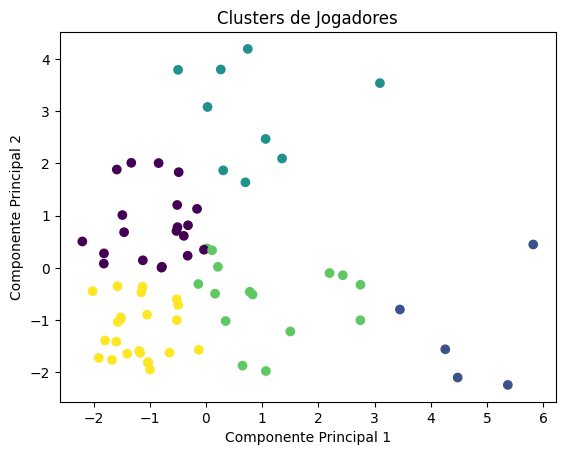

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters de Jogadores')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


In [17]:
# Selecionar apenas as colunas numéricas para calcular a correlação
numeric_columns = striker.select_dtypes(include=np.number).columns
correlation_matrix = striker[numeric_columns].corr()

# Exibir a matriz de correlação
print(correlation_matrix)

                   Minutos      PrgR        xG       xAG      G-PK  \
Minutos           1.000000  0.163219  0.177168  0.196787  0.093915   
PrgR              0.163219  1.000000  0.475444  0.416526  0.303312   
xG                0.177168  0.475444  1.000000  0.281933  0.819647   
xAG               0.196787  0.416526  0.281933  1.000000  0.162930   
G-PK              0.093915  0.303312  0.819647  0.162930  1.000000   
Assistencias      0.132044  0.387752  0.277294  0.549640  0.240586   
PrgC              0.193811  0.800215  0.151109  0.319820  0.024632   
PrgP              0.308573 -0.153114 -0.428582  0.251894 -0.321980   
Aerial Duel%     -0.040880 -0.226313 -0.041180 -0.349337  0.031062   
Aerial Duel Won   0.160790 -0.001940  0.540032 -0.149183  0.405030   
Aerial Duel Lost  0.255879  0.138491  0.561528  0.123130  0.390961   
Acoes Ofensivas   0.356500  0.323248 -0.260641  0.381188 -0.245409   
Cluster          -0.175510 -0.332129 -0.159385 -0.447287 -0.111546   

                  A

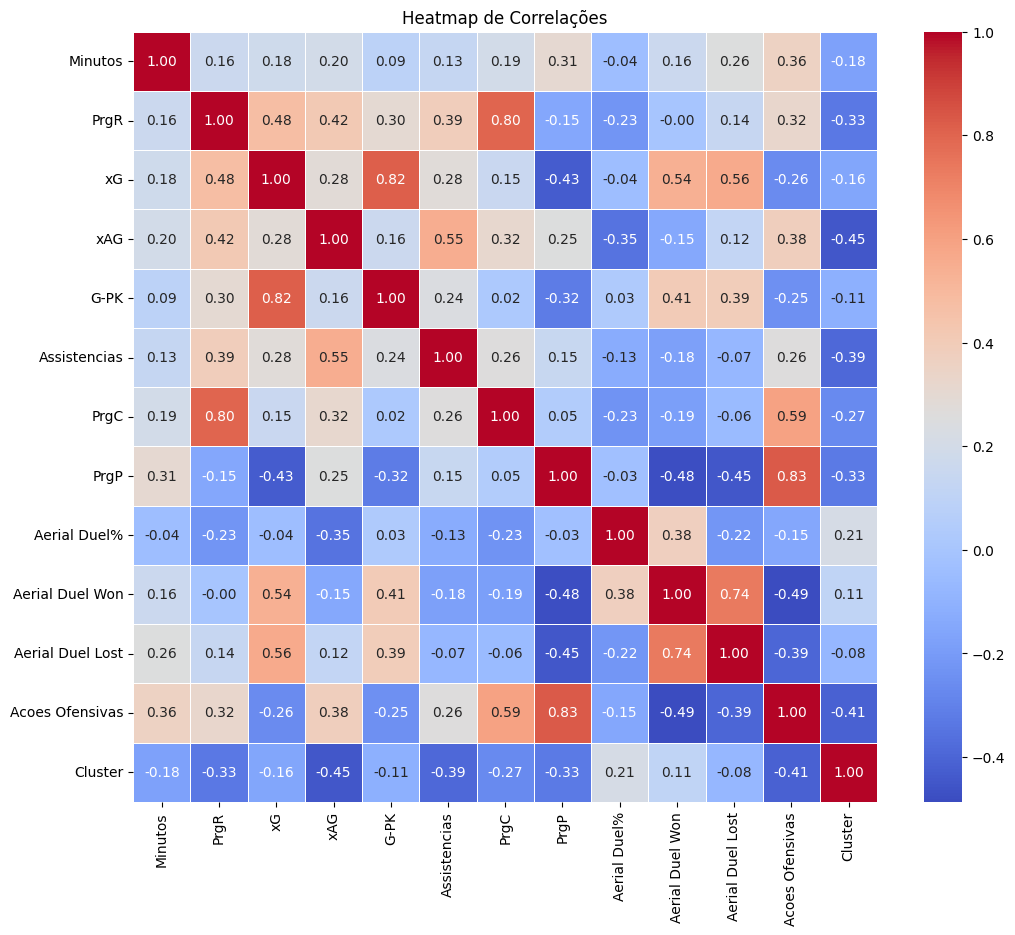

In [18]:
plt.figure(figsize=(12, 10))  # Define o tamanho da figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap de Correlações')
plt.show()

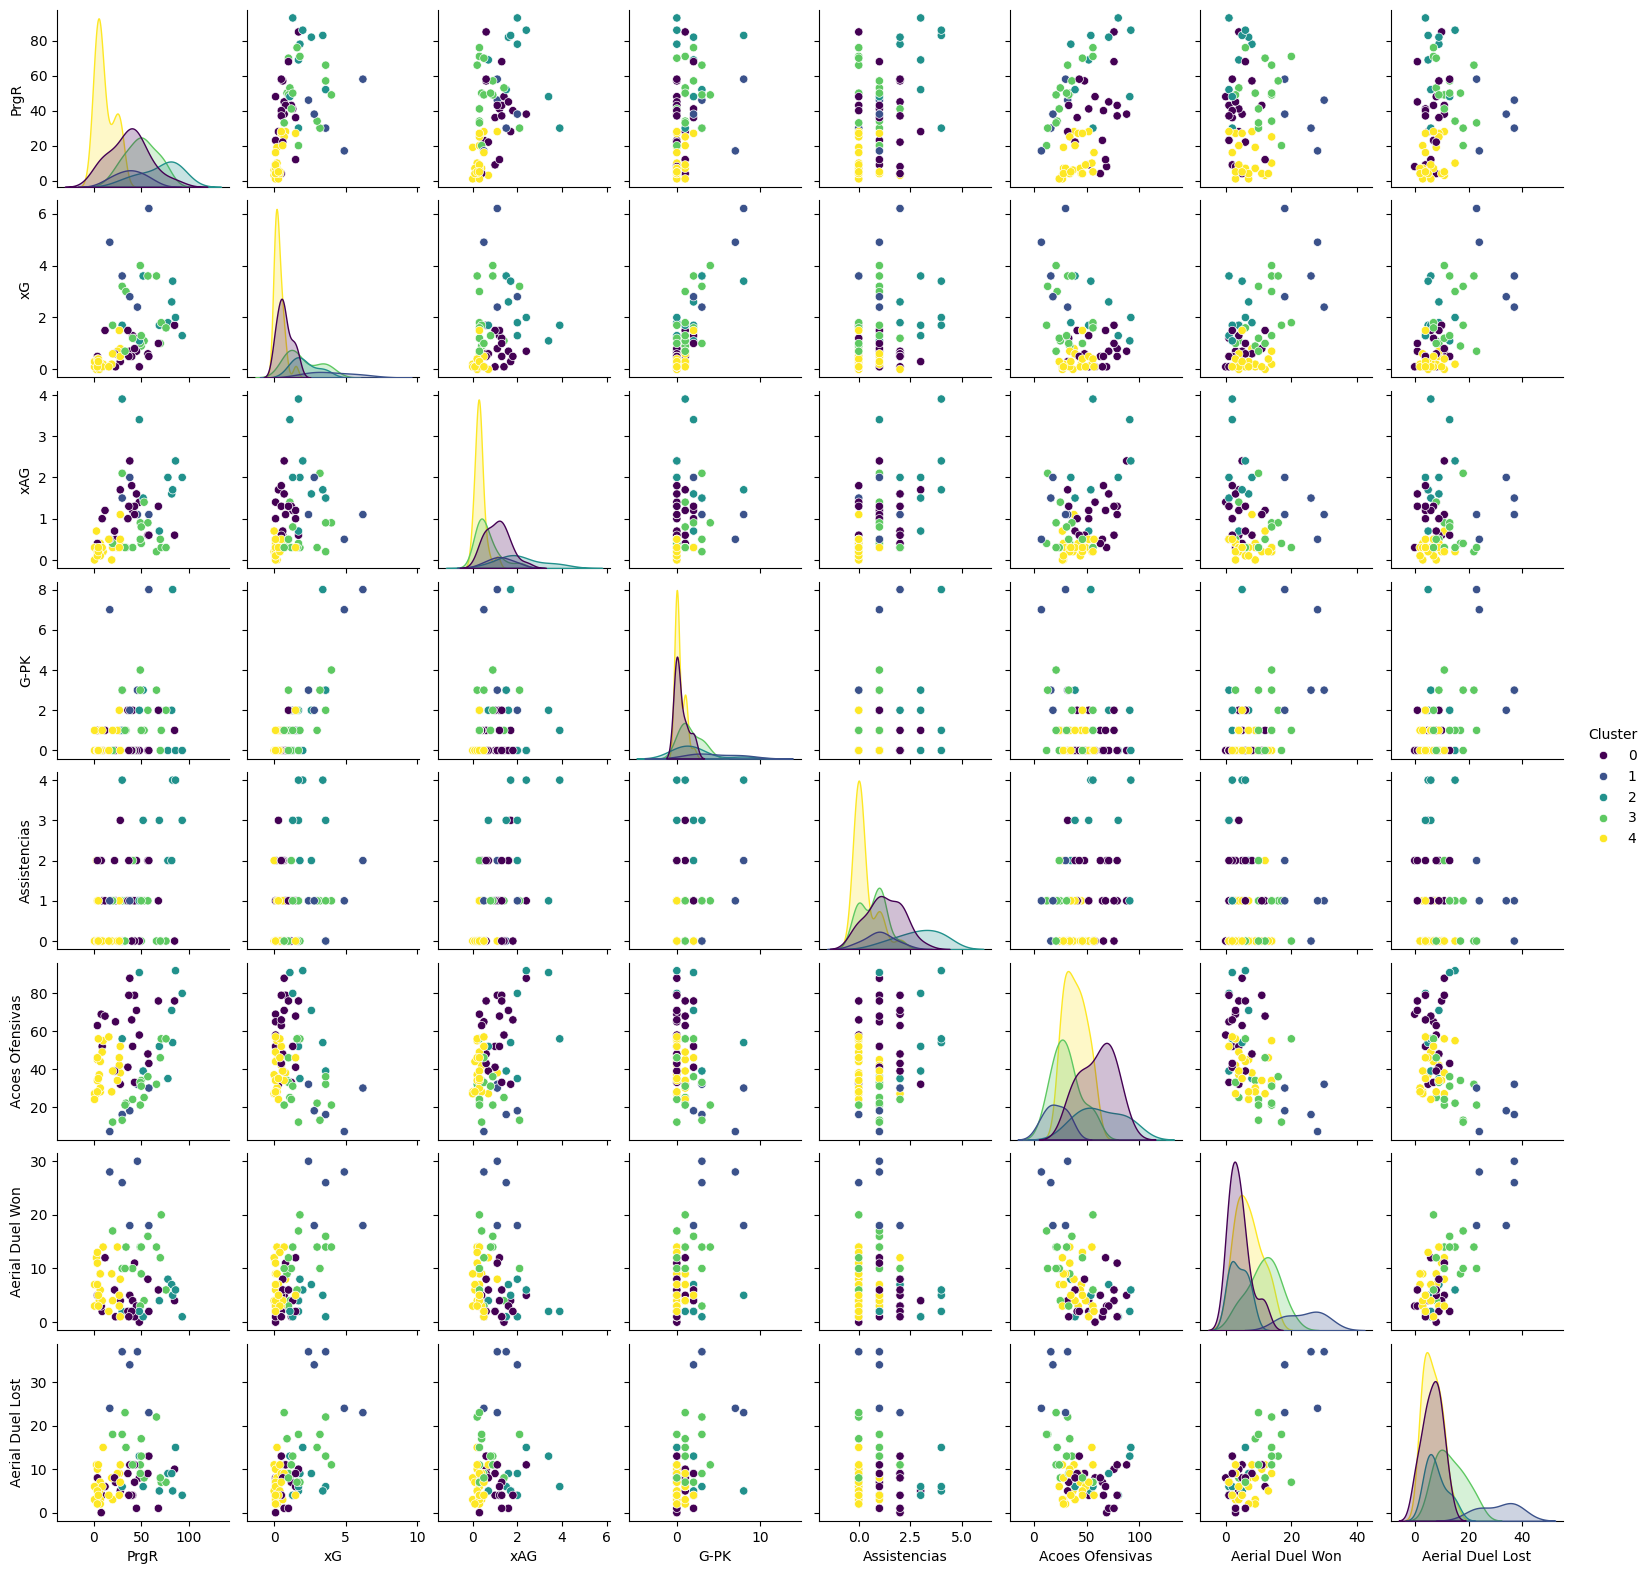

In [19]:
# Adicionar as métricas e o cluster ao DataFrame para visualização
metrics = ['PrgR','xG','xAG','G-PK','Assistencias','Acoes Ofensivas','Aerial Duel Won','Aerial Duel Lost','Cluster']

# Plotar o pair plot para todas as métricas
sns.pairplot(striker[metrics], hue='Cluster', palette='viridis', diag_kind='kde', height=2)
plt.show()


### **Análise de Correlações Detalhada para Atacantes**

---

A matriz de correlação nos dá uma visão clara sobre como as variáveis estão relacionadas entre si e com os clusters formados.

#### **🔥 Principais Correlações Positivas:**
**PrgR e PrgC:** Correlação muito alta (0.80) — indica que jogadores que progridem bem com a bola (PrgR) também tendem a contribuir com passes progressivos (PrgC).

**xG e G-PK:** Correlação muito forte (0.82) — jogadores com mais gols (sem pênaltis) têm altos Expected Goals, o que mostra coerência no desempenho ofensivo.

**PrgP e Acoes Ofensivas:** Correlação alta (0.83) — quem realiza passes progressivos também participa bastante de ações ofensivas.

#### **📉 Principais Correlações Negativas com o Cluster:**
**xAG (-0.45), Acoes Ofensivas (-0.41) e Assistências (-0.39):** quanto maior a contribuição ofensiva (em termos de assistências esperadas e reais), menor tende a ser o número do cluster. Isso indica que os melhores atacantes (provavelmente no Cluster 0 ou 1) são mais produtivos nesses quesitos.

**PrgR, PrgP, PrgC e xG** também têm correlação negativa com o cluster — reforçando o padrão de que jogadores com mais ações progressivas e gols esperados pertencem aos clusters mais baixos (melhores desempenhos).

#### **Outras Observações:**
Aerial Duel% (porcentagem de duelos aéreos ganhos) tem baixa correlação com a maioria das variáveis, sugerindo que essa métrica não diferencia tanto os atacantes nos clusters.

Minutos jogados tem correlação baixa com quase tudo, o que indica que tempo de jogo não está diretamente relacionado ao desempenho ofensivo nem à clusterização.



## Distribuição dos Clusters

### **2. 💡 Perfis dos Clusters**

#### **Cluster 0 (Roxo)**
Aparece com jogadores com altos valores de xG, xAG, PrgR, Ações Ofensivas e G-PK.

Provavelmente representa os atacantes mais completos e produtivos.

#### **Cluster 1 (Verde escuro):**

Junto com o Cluster 0, parece ocupar o espaço com valores ofensivos medianos a altos, mas com menos concentração no topo — possivelmente atacantes de bom desempenho, mas menos consistentes.

#### **Cluster 2 (Amarelo):**

Grande presença em regiões com baixa produção ofensiva, muitas vezes com distribuições mais finas.

Pode representar jogadores com pouco tempo de jogo ou função mais tática do que produtiva.

#### **Cluster 3 (Ciano/Verde claro):**

Bastante disperso, ocupando regiões medianas de várias métricas. Pode representar atacantes de apoio ou versáteis, com contribuições moderadas em várias frentes.

#### **Cluster 4 (Azul escuro):**

Distribuições relativamente concentradas em valores baixos, semelhante ao Cluster 2 — pode indicar atacantes reservas, jovens ou que atuaram pouco.

#### **Densidade nas Diagonais:**
As curvas KDE nas diagonais confirmam a separação dos clusters, com o Cluster 0 tendo densidade em regiões altas, reforçando seu perfil ofensivo mais forte.

In [28]:
cluster_names = {
    0: 'ata completos',
    1: 'ata inconsistentes',
    2: 'ata tatico',
    3: 'ata apoio',
    4: 'ata reservas'
}

# Adicionar nomes ao DataFrame
striker['Perfil'] = striker['Cluster'].map(cluster_names)

# Exibir os primeiros jogadores com seus perfis
print(striker[['PrgR','xG','xAG','G-PK','Assistencias','Acoes Ofensivas','Perfil']].head())

    PrgR   xG  xAG  G-PK  Assistencias  Acoes Ofensivas         Perfil
7     38  0.7  2.4     0             1        95.652174  ata completos
8     78  1.8  2.0     0             2        38.043478     ata tatico
19    66  3.6  0.2     3             0        34.782609      ata apoio
22    85  1.7  0.6     1             0        82.608696  ata completos
26     9  0.1  1.0     0             1        56.521739  ata completos


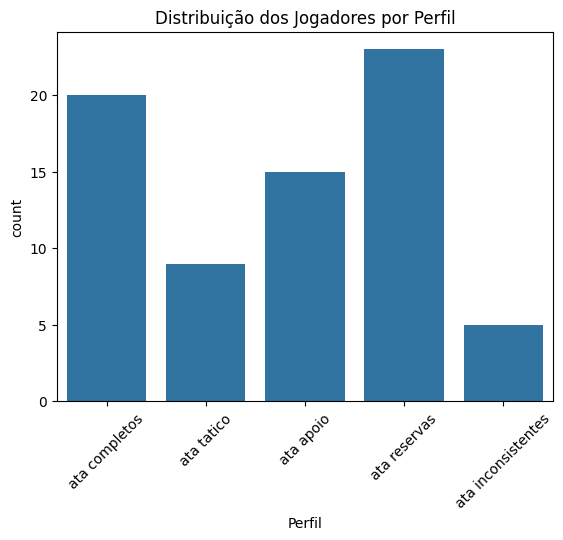

In [29]:
sns.countplot(data=striker, x='Perfil')
plt.xticks(rotation=45)
plt.title('Distribuição dos Jogadores por Perfil')
plt.show()


In [31]:
# Função para exibir jogadores de um perfil específico
def exibir_jogadores_por_perfil(perfil_escolhido):
    # Filtrar os jogadores pelo perfil escolhido
    jogadores_filtrados = striker[striker['Perfil'] == perfil_escolhido]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado para o perfil: {perfil_escolhido}")
    else:
        print(f"\nJogadores no perfil: {perfil_escolhido}")
        print(jogadores_filtrados[['jogador','time','posicao', 'Minutos','PrgR','xG','xAG','G-PK','Assistencias','Acoes Ofensivas','Aerial Duel%',]])

# Exemplo: Exibir jogadores do perfil "Apoiadores Ofensivos"
# Definir a largura máxima e o número de colunas exibidas
pd.set_option('display.max_columns', None)  # Exibir todas as colunas
pd.set_option('display.width', 1000)        # Aumentar a largura da tabela
perfil_escolhido = "ata completos"  # Altere conforme necessário
exibir_jogadores_por_perfil(perfil_escolhido)



Jogadores no perfil: ata completos
                  jogador              time posicao  Minutos  PrgR   xG  xAG  G-PK  Assistencias  Acoes Ofensivas  Aerial Duel%
7          Gustavo Scarpa  Atlético Mineiro   MF,FW      868    38  0.7  2.4     0             1        95.652174          31.3
22           Tomás Cuello  Atlético Mineiro   FW,MF      673    85  1.7  0.6     1             0        82.608696          28.6
26         Caio Alexandre             Bahia      MF      651     9  0.1  1.0     0             1        56.521739          33.3
69         Marlon Freitas     Botafogo (RJ)      MF      848     8  0.1  0.3     0             2             75.0         100.0
94            Lucas Mugni             Ceará      MF      637    28  0.3  1.7     1             3        34.782609          44.4
105        André Carrillo       Corinthians      MF      611    48  0.1  1.4     0             0        63.043478           0.0
107                 Breno       Corinthians      MF      742    23  

In [33]:
# Dicionário dos peso para cada métrica
pesos = {
    'PrgR': 4,
    'xG': 5,
    'xAG': 4,
    'G-PK': 10.0,
    'Assistencias': 3,
    'Acoes Ofensivas': 2,
    'Aerial Duel%': 2
}

# Função para normalizar uma métrica com base no valor máximo
def normalizar(coluna):
    return coluna / coluna.max()

# Normalizando 'Acoes Ofensivas' e 'Aerial Duel%'
striker['Acoes Ofensivas'] = normalizar(striker['Acoes Ofensivas']) * 100
striker['Aerial Duel%'] = normalizar(striker['Aerial Duel%']) * 100

# Calculando as pontuações individuais para cada métrica
for coluna, peso in pesos.items():
    striker[coluna + '_Pontuacao'] = striker[coluna] * peso

# Calculando a pontuação total
colunas_pontuacao = [coluna + '_Pontuacao' for coluna in pesos.keys()]
striker['Pontuacao_Total'] = striker[colunas_pontuacao].sum(axis=1)

# **Normalizando a pontuação total para o intervalo [0, 100]**
min_pontuacao = striker['Pontuacao_Total'].min()
max_pontuacao = striker['Pontuacao_Total'].max()
striker['Pontuacao'] = (
    (striker['Pontuacao_Total'] - min_pontuacao) / (max_pontuacao - min_pontuacao)
) * 100

# Filtrando os jogadores por perfil desejado e ordenando pelo total normalizado
perfil_escolhido = 'ata completos'
jogadores_filtrados = striker[striker['Perfil'] == perfil_escolhido]
jogadores_ordenados = jogadores_filtrados.sort_values(by='Pontuacao', ascending=False)

# Adicionando uma coluna de ranking
jogadores_ordenados['Ranking'] = range(1, len(jogadores_ordenados) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = jogadores_ordenados[['Ranking','time','posicao', 'jogador', 'Perfil', 'Pontuacao']]

# Imprimindo o resultado final no console
print("\nRanking de jogadores no perfil:", perfil_escolhido)
print(resultado_final.to_string(index=False))


Ranking de jogadores no perfil: ata completos
 Ranking             time posicao              jogador        Perfil  Pontuacao
       1    Vasco da Gama      FW Nuno Gonçalo Moreira ata completos  95.343802
       2 Atlético Mineiro   FW,MF         Tomás Cuello ata completos  83.690314
       3         Flamengo   FW,MF               Gerson ata completos  67.142449
       4         Mirassol   MF,FW          Danielzinho ata completos  58.156575
       5    Internacional   FW,MF               Wesley ata completos  54.731983
       6 Atlético Mineiro   MF,FW       Gustavo Scarpa ata completos  51.555964
       7         Cruzeiro      MF      Matheus Pereira ata completos  49.432266
       8    Botafogo (RJ)      MF       Marlon Freitas ata completos  45.120779
       9           Santos   MF,FW  Benjamín Rollheiser ata completos   43.14432
      10     Sport Recife   MF,FW           Lucas Lima ata completos  41.881534
      11    RB Bragantino      FW    Vinicius Mendonça ata completos  39.

In [35]:
# Filtrando os jogadores pelo perfil escolhido
perfil_escolhido = 'ata completos'  # Defina o perfil desejado
jogadores_filtrados = striker[striker['Perfil'] == perfil_escolhido].copy()

# Lista com os nomes dos jogadores disponíveis
jogadores_disponiveis = jogadores_filtrados['jogador'].tolist()

# Dicionário para armazenar os valores de mercado inseridos
valores_mercado = {}

# Loop para inserir manualmente os jogadores e seus valores
print(f"Jogadores disponíveis no perfil '{perfil_escolhido}': {jogadores_disponiveis}")

while jogadores_disponiveis:
    # Input para selecionar o jogador
    jogador_escolhido = input("Digite o nome do jogador (ou 'sair' para finalizar): ")

    # Verifica se o nome inserido é válido ou finaliza o processo
    if jogador_escolhido.lower() == 'sair':
        break
    elif jogador_escolhido not in jogadores_disponiveis:
        print("Jogador não encontrado. Tente novamente.")
        continue

    # Input para inserir o valor de mercado
    while True:
        try:
            valor = float(input(f"Insira o valor de mercado para {jogador_escolhido} (€M): "))
            valores_mercado[jogador_escolhido] = valor  # Armazena o valor inserido
            jogadores_disponiveis.remove(jogador_escolhido)  # Remove da lista de disponíveis
            break
        except ValueError:
            print("Valor inválido. Por favor, insira um número válido.")

# Adicionando os valores de mercado ao DataFrame
jogadores_filtrados['Valor de Mercado (€M)'] = jogadores_filtrados['jogador'].map(valores_mercado)

# Calculando o custo por ponto
jogadores_filtrados['Custo por Ponto (€M)'] = (
    jogadores_filtrados['Valor de Mercado (€M)'] / jogadores_filtrados['Pontuacao']
)

# Calculando o Score de valor
jogadores_filtrados['Score de Valor'] = (
    jogadores_filtrados['Pontuacao'] / jogadores_filtrados['Valor de Mercado (€M)']
)

# Ordenando pelo maior Score de valor
resultado_final = jogadores_filtrados.sort_values(by='Score de Valor', ascending=False)

# Adicionando a coluna de ranking
resultado_final['Ranking'] = range(1, len(resultado_final) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = resultado_final[
    ['Ranking', 'jogador', 'Valor de Mercado (€M)', 'Pontuacao', 'Custo por Ponto (€M)', 'Score de Valor']
]

# Exibindo o resultado final
print("\nRanking de jogadores por eficiência de valor:")
print(resultado_final.to_string(index=False))


Jogadores disponíveis no perfil 'ata completos': ['Gustavo Scarpa', 'Tomás Cuello', 'Caio Alexandre', 'Marlon Freitas', 'Lucas Mugni', 'André Carrillo', 'Breno', 'Lucas Silva', 'Matheus Pereira', 'Wanderson', 'Gerson', 'Martinelli', 'Wesley', 'Danielzinho', 'Facundo Torres', 'Richard Ríos', 'Vinicius Mendonça', 'Benjamín Rollheiser', 'Lucas Lima', 'Nuno Gonçalo Moreira']
Digite o nome do jogador (ou 'sair' para finalizar): Nuno Gonçalo Moreira
Insira o valor de mercado para Nuno Gonçalo Moreira (€M): 10
Digite o nome do jogador (ou 'sair' para finalizar): Tomás Cuello
Insira o valor de mercado para Tomás Cuello (€M): 7
Digite o nome do jogador (ou 'sair' para finalizar): Marlon Freitas
Insira o valor de mercado para Marlon Freitas (€M): 8
Digite o nome do jogador (ou 'sair' para finalizar): André Carrillo
Insira o valor de mercado para André Carrillo (€M): 9
Digite o nome do jogador (ou 'sair' para finalizar): sair

Ranking de jogadores por eficiência de valor:
 Ranking              jo


Jogadores selecionados: Tomás Cuello, Yuri Alberto, Facundo Torres, Benjamín Rollheiser, Nuno Gonçalo Moreira
     PrgR   xG  xAG  G-PK  Assistencias  Acoes Ofensivas  Minutos
22     85  1.7  0.6     1             0        82.608696      673
131    49  4.0  0.9     4             1        22.826087      726
363    36  1.5  1.0     2             1        44.565217      634
408    40  0.5  1.8     0             0         71.73913      804
506    68  1.0  1.3     2             1        82.608696      765


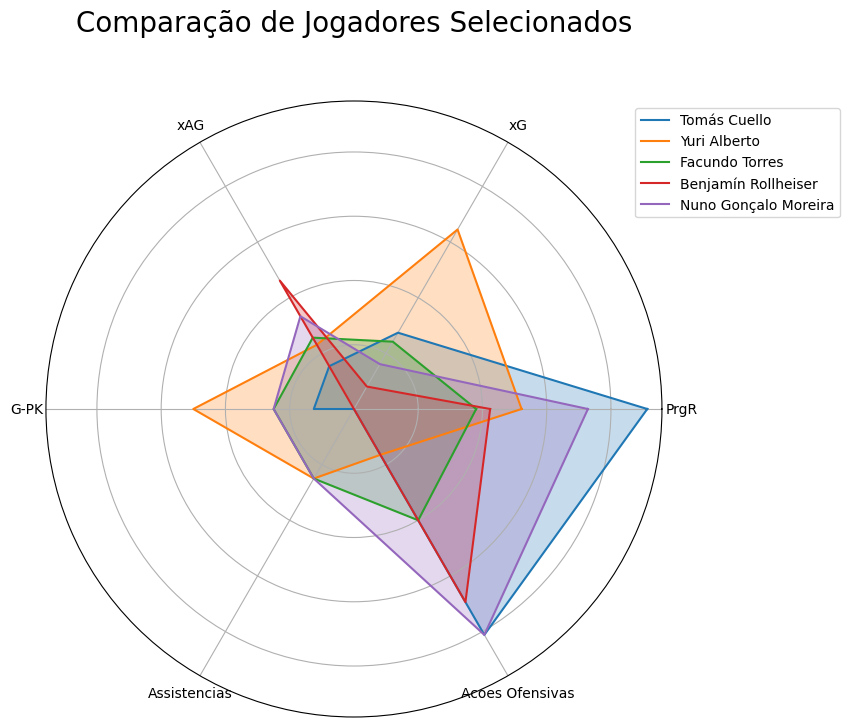

In [37]:
def radar_chart_por_jogadores(jogadores_selecionados, df):
    # Filtrar os jogadores pelos nomes inseridos
    jogadores_filtrados = df[df['jogador'].isin(jogadores_selecionados)]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado nos nomes fornecidos: {jogadores_selecionados}")
        return

    print(f"\nJogadores selecionados: {', '.join(jogadores_filtrados['jogador'])}")
    print(jogadores_filtrados[['PrgR', 'xG', 'xAG', 'G-PK', 'Assistencias', 'Acoes Ofensivas', 'Minutos']])

    # Definir as métricas a serem exibidas no radar
    metricas = ['PrgR', 'xG', 'xAG', 'G-PK', 'Assistencias', 'Acoes Ofensivas']
    num_vars = len(metricas)

    # Normalizar as métricas para todas ficarem na escala [0, 1]
    jogadores_normalizados = jogadores_filtrados.copy()
    for metrica in metricas:
        min_val = df[metrica].min()
        max_val = df[metrica].max()
        jogadores_normalizados[metrica] = (jogadores_filtrados[metrica] - min_val) / (max_val - min_val)

    # Ângulos para o gráfico radar
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Fechar o círculo

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Loop pelos jogadores selecionados
    for i, row in jogadores_normalizados.iterrows():
        valores = row[metricas].tolist()
        valores += valores[:1]  # Fechar o círculo

        # Plotar a linha e o preenchimento para o jogador
        ax.plot(angles, valores, label=row['jogador'])
        ax.fill(angles, valores, alpha=0.25)

    # Configurações do gráfico
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metricas)

    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.title('Comparação de Jogadores Selecionados', size=20, color='black', y=1.1)
    plt.show()

# Exemplo de uso: Insira os nomes dos jogadores que deseja comparar
jogadores_selecionados = ['Tomás Cuello', 'Nuno Gonçalo Moreira','Benjamín Rollheiser','Facundo Torres','Yuri Alberto']  # Altere conforme necessário
radar_chart_por_jogadores(jogadores_selecionados, striker)